In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics #for evaluation
from xgboost import XGBRegressor

Calories burned is a complex physiological interaction problem → Boosted trees are designed exactly for this.

In [115]:
calories_data=pd.read_csv('/content/calories.csv')
calories_data.tail(3)

,User_ID,Calories
14997,17271188,75.0
14998,18643037,11.0
14999,11751526,98.0


In [116]:
exercise_data=pd.read_csv('/content/exercise.csv')
exercise_data.tail(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5


In [117]:
#Combining 2 dataframes
calories_data = pd.concat([exercise_data, calories_data['Calories']], axis=1)
calories_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [118]:
calories_data.shape

(15000, 9)

In [119]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [120]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data Analysis

In [121]:
#gets some statistical measures about the dataset
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

-Numerical data

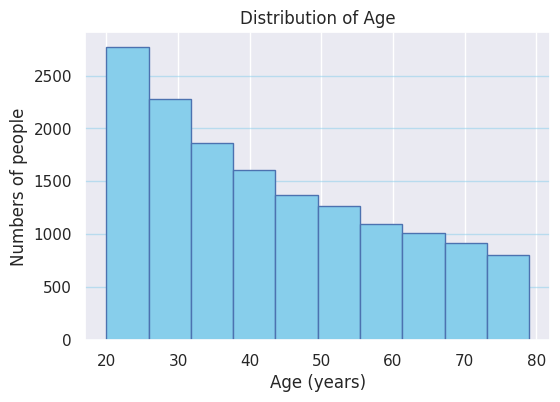

In [122]:
#Uisng matplotlib
plt.figure(figsize=(6,4))
plt.hist(calories_data['Age'], color='skyblue', edgecolor='b')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Numbers of people')
plt.grid(axis='y', alpha=0.5, color='skyblue')
plt.show()

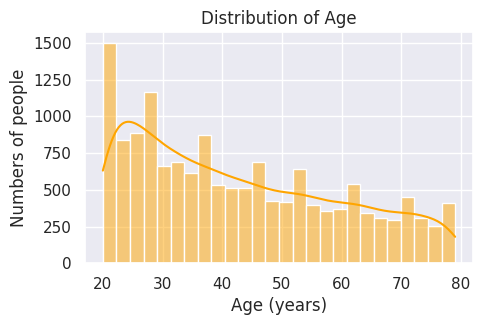

In [123]:
#using seaborn
sns.set() #by doing this plots look more beautiful & consistent😄
plt.figure(figsize=(5,3))
sns.histplot(calories_data['Age'], kde=True, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Numbers of people')
plt.show()

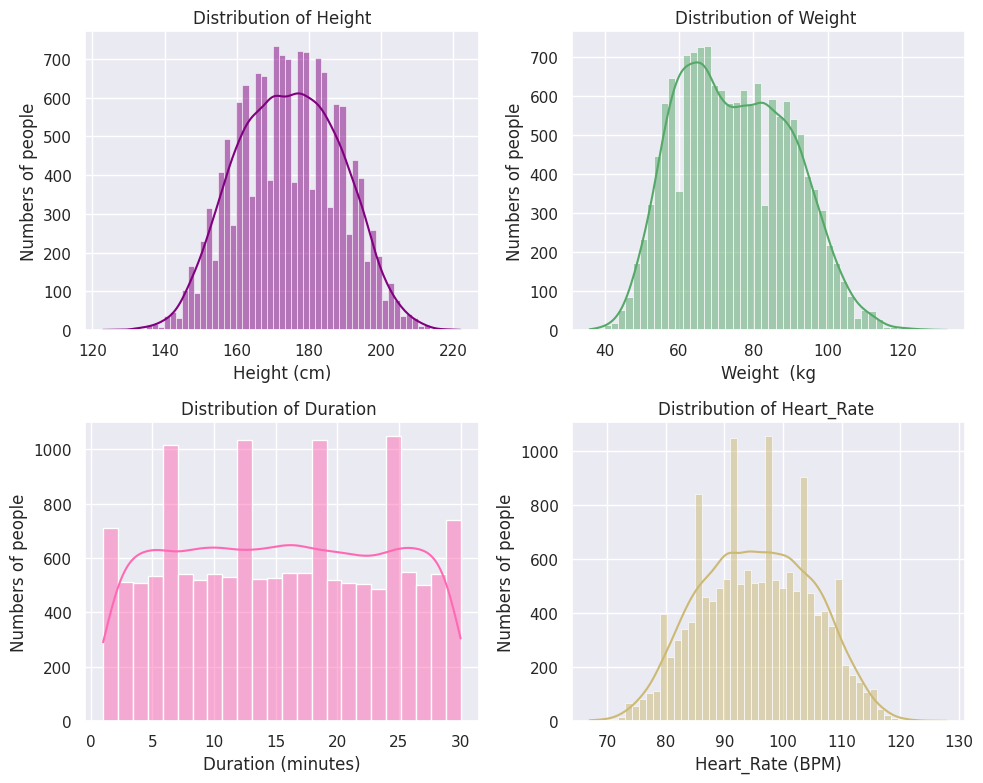

In [124]:
#Using subploot of matplotlib
plt.figure(figsize=(10,8))

#-----Height-----
plt.subplot(2,2,1)

sns.histplot(calories_data['Height'], kde=True, color='purple')
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Numbers of people')

#-----Weight-----
plt.subplot(2,2,2)

sns.histplot(calories_data['Weight'], kde=True, color='g')
plt.title('Distribution of Weight ')
plt.xlabel('Weight  (kg')
plt.ylabel('Numbers of people')

#-----Duration-----
plt.subplot(2,2,3)

sns.histplot(calories_data['Duration'], kde=True, color='hotpink')
plt.title('Distribution of Duration ')
plt.xlabel('Duration (minutes)')
plt.ylabel('Numbers of people')

#----Heart_Rate----
plt.subplot(2,2,4)

sns.histplot(calories_data['Heart_Rate'], kde=True, color='y')
plt.title('Distribution of Heart_Rate ')
plt.xlabel('Heart_Rate (BPM)')
plt.ylabel('Numbers of people')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3521047166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'], kde=True, color='b')


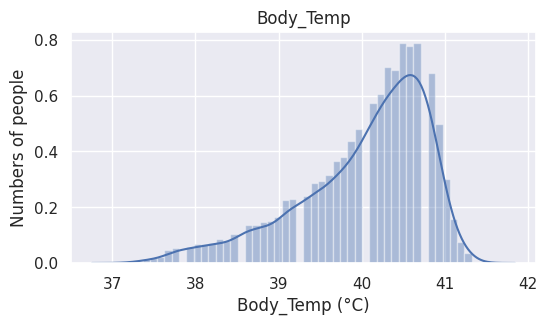

In [125]:
plt.figure(figsize=(6,3))
sns.distplot(calories_data['Body_Temp'], kde=True, color='b')
plt.title('Body_Temp')
plt.xlabel('Body_Temp (°C)')
plt.ylabel('Numbers of people')
plt.show()

### -categorical data

using matplotlib

Gender
female    7553
male      7447
Name: count, dtype: int64


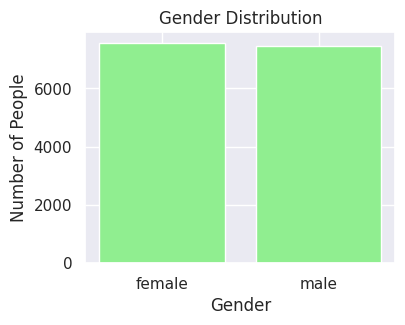

In [126]:
#counts number of males and females
gender_counts = calories_data['Gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(4,3))
plt.bar(gender_counts.index, gender_counts.values, color='lightgreen')
plt
#gender_counts.index → bar er labels (male, female)
#gender_counts.values → bar er height (count of people)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()

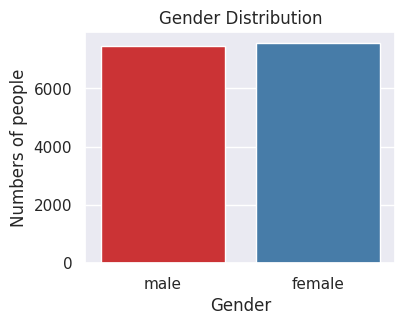

In [127]:
#using seaborn -it’s even simpler because it can automatically count categories
plt.figure(figsize=(4,3))
sns.countplot(data=calories_data, x='Gender', hue='Gender', palette='Set1')
plt.title('Gender Distribution')
plt.ylabel('Numbers of people')
plt.show()
#hue = removes warnings, and add korle ek bar er bhitore sub-categories alada color e show hoy.Jodi hue na thake, pura bar ek color thake.

## Encoding Gender

In [128]:
calories_data['Gender']=calories_data['Gender'].map({'female':1, 'male':0})

In [129]:
calories_data['Gender'].value_counts()

,count
Gender,
1,7553
0,7447


In [130]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


## Finding the correlation betwen columns
  -1.Positive Correlation
   2.Negative Correlation

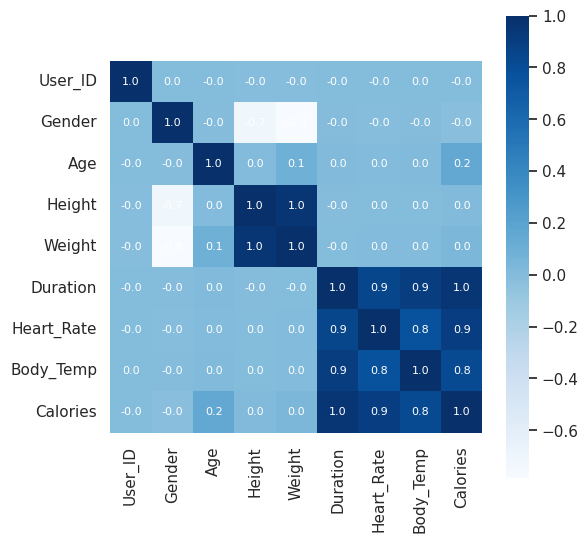

In [131]:
#constructing a heatmap to understand the heatmap
plt.figure(figsize=(6,6))
correlation = calories_data.corr()
sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt='.1f', annot_kws={'size':8, 'color':'w'}, cmap='Blues') #cbar=the side bar, square=makess the box square, fmt=format of the annonation text (annonation=গ্রাফ বা ছবির ভিতরে সরাসরি সংখ্যা বা তথ্য লিখে দেখানো।), annot_kws=annot_keyword, it can have font size and color etc,
plt.show()

## Separating features and target

In [132]:
X=calories_data.drop(['User_ID','Calories'], axis=1)
Y=calories_data['Calories']

In [133]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


## Spliting into trianing and test data

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(15000, 7) (10500, 7) (4500, 7) (10500,) (4500,)


## Time to training our model

In [135]:
regressor=XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=2
)
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [136]:
train_data_prediction=regressor.predict(X_train)
from sklearn.metrics import r2_score
train_data_accuracy = r2_score(Y_train, train_data_prediction)
train_data_accuracy

0.9993740896156516

In [137]:
test_data_prediction=regressor.predict(X_test)
from sklearn.metrics import r2_score
test_data_accuracy = r2_score(Y_test, test_data_prediction)
test_data_accuracy

0.9990311173501911

In [140]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print(mae)

1.3652855523135512
